In [ ]:
library(tidyverse)
library(infer)
library(datateachr)
library(testthat)
library(digest)
library(broom)
library(cowplot)
options(repr.matrix.max.rows = 6)

## The relationship between fuel efficiency and fuel type


### Introduction

When purchasing a car, one of the most critical factors to consider is fuel efficiency. A more efficient car would help save more money on fuel and also reduce carbon footprints. The primary measurement of a car's fuel efficiency is using miles per gallon, also called MPG. It is the distance measured in miles that a vehicle can travel per gallon of fuel. The higher a car's MPG, the more fuel-efficient it is. According to the Universal Technical Institute, diesel cars have 20% more thermal efficiency than gasoline cars. Thermal efficiency is a measure of how much heat transforms into energy. However, this research does not report the difference in fuel efficiency between the two gas types (Baures, 2019; Chevrolet, 2021; Gas vs. Diesel Engines: What is the Difference? 2021).

In this project, we will be utilizing a dataset from Kaggle, which collects the data from 30 types of vehicles, to address the question, "How do the different fuel types behave on fuel efficiency?". We aim to compare the efficiency, using MPG, of the two fuel types and to determine which one is more efficient. 


<img src="../STAT201_GP_7/intro_pic.png" width="300" height="300" align="center"/>

Introduction Picture (*Gas vs. Diesel Engines: What is the Difference? 2021*)

<img src="../STAT201_GP_7/intro_pic_2.png" width="400" height="400" align="center"/>

Introduction Picture (*What Is the Difference Between Diesel and Gas? Sweeney Chevrolet. 2021*)

##### Loading the data into Jypiter

In [14]:
df <- read.csv("https://raw.githubusercontent.com/Zibo-S/STAT201_GP_7/main/database.csv", header = TRUE) 
     
head(df)


,Vehicle.ID,Year,Make,Model,Class,Drive,Transmission,Transmission.Descriptor,Engine.Index,Engine.Descriptor,⋯,Hours.to.Charge..AC.240V.,Composite.City.MPG,Composite.Highway.MPG,Composite.Combined.MPG,Range..FT1.,City.Range..FT1.,Highway.Range..FT1.,Range..FT2.,City.Range..FT2.,Highway.Range..FT2.
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9001,(FFS),⋯,0,0,0,0,0,0,0,,0,0
2,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,,Manual 5-Speed,,9005,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
3,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9002,(FFS),⋯,0,0,0,0,0,0,0,,0,0
4,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,,Manual 5-Speed,,9006,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0
5,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1830,(FFS),⋯,0,0,0,0,0,0,0,,0,0
6,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,,1880,(FFS) CA model,⋯,0,0,0,0,0,0,0,,0,0


The factors we are interested in are 
- MPG in the City (median, interquartile): 
- MPG in the Highway (median, interquartile );
- Annual Fuel Cost (mean, sd );


The dataset resource used is Vehicle Fuel Economy Estimates, from 1984-2017, obtained from Kaggle. The Fuel.Type column stores the fuel type of the car, with values ranging from Electricity and Gasoline. For this project, we will be focusing on the examples that have the fuel type “Gasoline or E85” and “Diesel.” The factors that we are interested in are available in the dataset, called City.MPG..FT1 (MPG in the city) in the unit miles, Highway.MPG..FT1 (MPG on the highway) in the unit miles and the Annual.Fuel.Cost..FT1 (Annual Fuel Cost) in the unit dollars.

### Method and Results


##### Plot the distribution of factors we are interested in

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


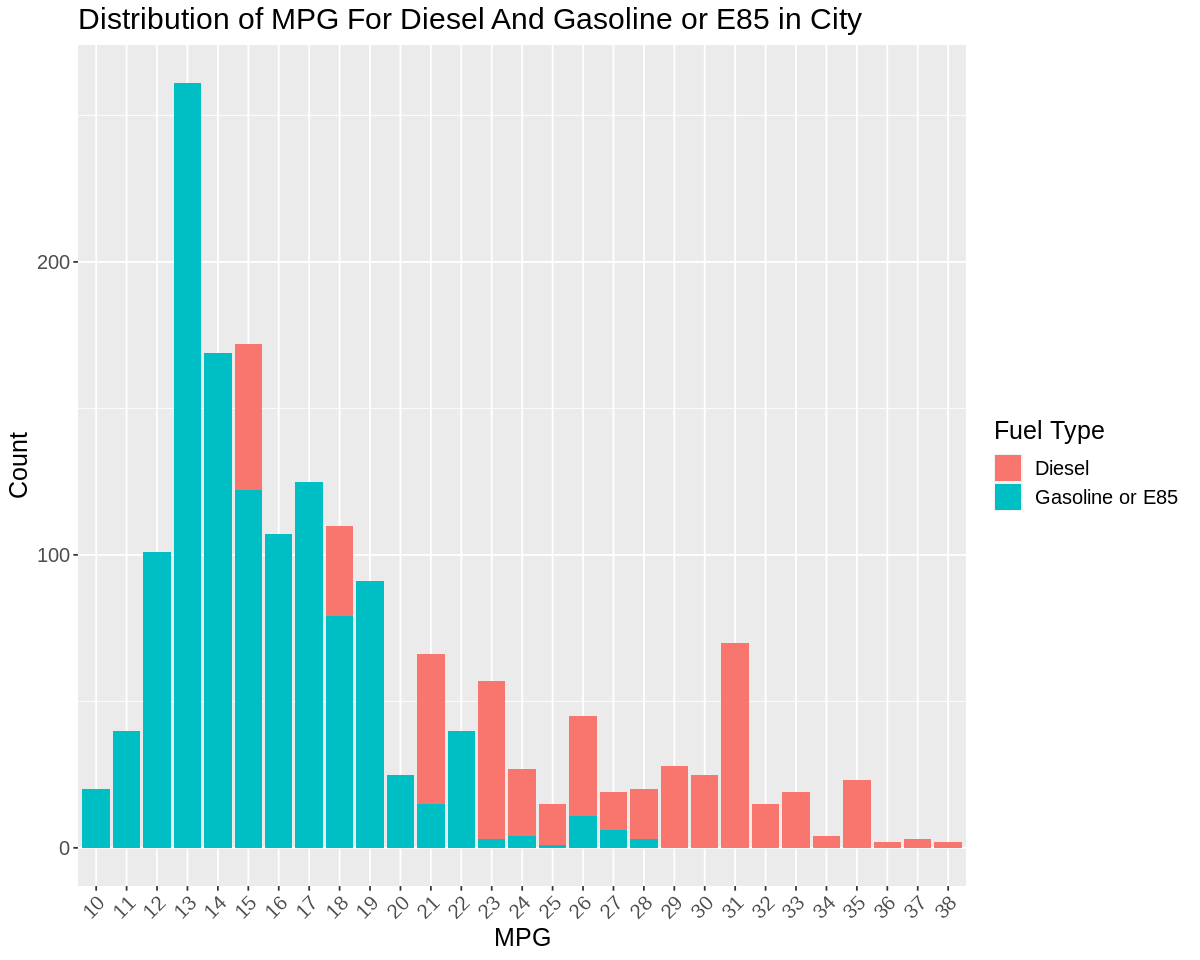

In [57]:
options(repr.plot.width=10, repr.plot.height=8)

tidy_data <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
     ggplot() +
     geom_histogram(aes( x=  MPG ,fill = fuel_type),position="identity", stat="count")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 in City") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
guides(fill=guide_legend(title="Fuel Type"))
    
tidy_data

Plot I: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 In City*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


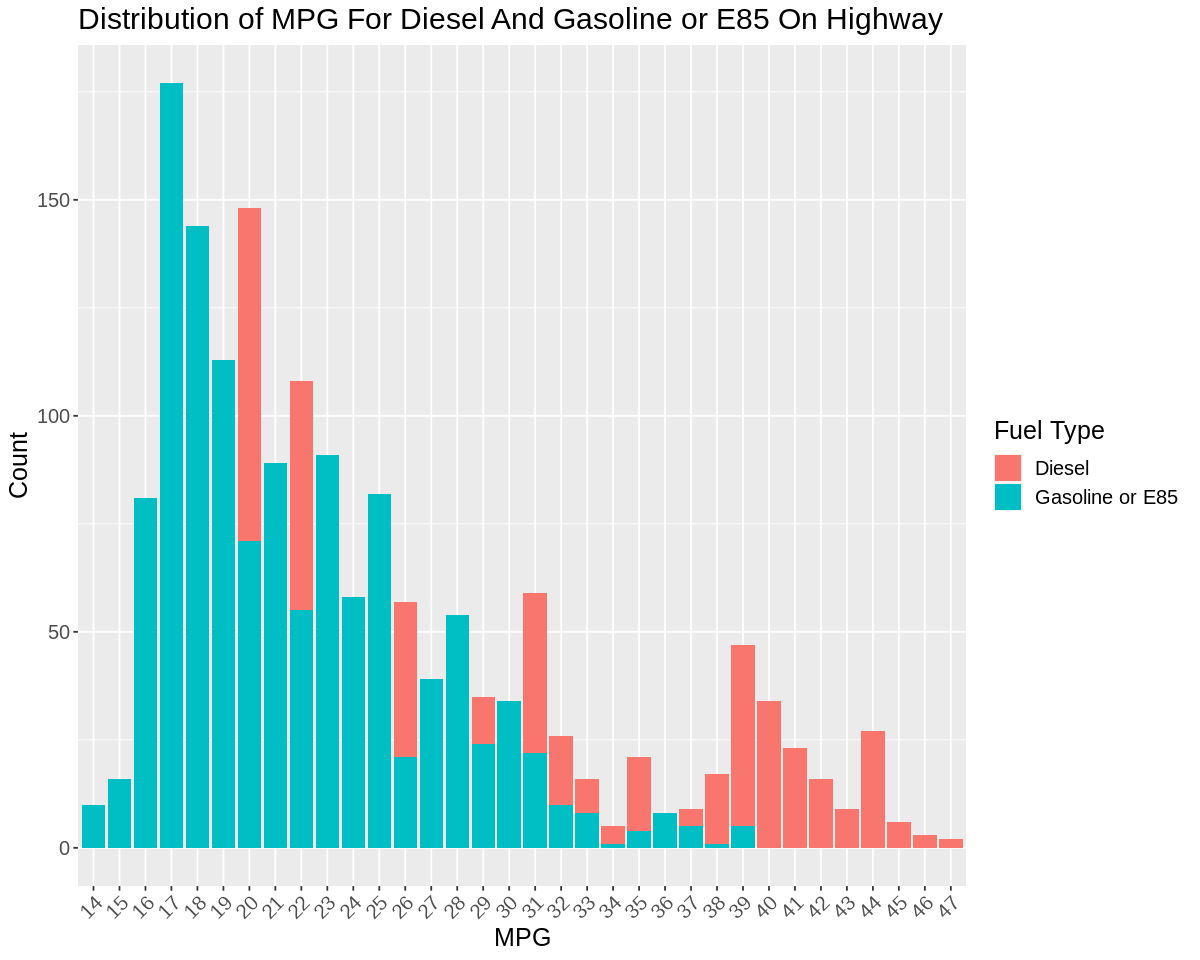

In [56]:
#$df$"Fuel Type 1
tidy_data2 <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
     ggplot() +
     geom_histogram(aes( x=  MPG ,fill = fuel_type),position="identity", stat="count")+
     ggtitle("Distribution of MPG For Diesel And Gasoline or E85 On Highway ") + 
     xlab("MPG") +
     ylab("Count") + 
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
guides(fill=guide_legend(title="Fuel Type"))
tidy_data2

Plot II: *Histogram of the Distribution of MPG For Diesel And Gasoline or E85 On Highway*

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


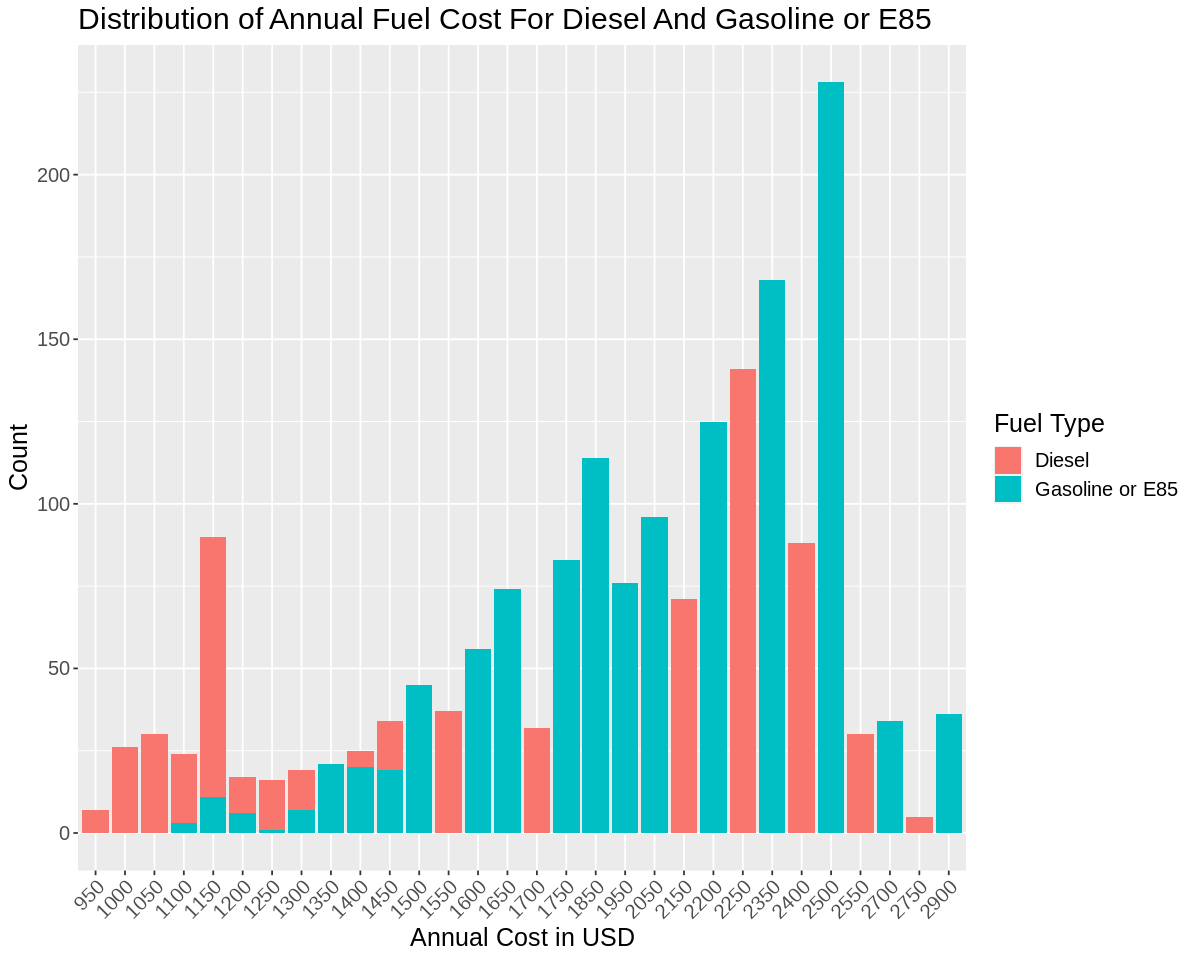

In [54]:
tidy_data3 <- df %>% 
    select('Fuel.Type','Annual.Fuel.Cost..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), Price = as_factor(df$'Annual.Fuel.Cost..FT1.')) %>%
    select(fuel_type, Price)%>%
    filter(fuel_type == "Diesel" | fuel_type == "Gasoline or E85") %>%
    
     ggplot() +
#      geom_histogram(aes( x=  Price ,fill = fuel_type, color=fuel_type, stat="identity"),binwidth=30, ,stat="count")+#, stat="dodge") +
     geom_histogram(aes( x=  Price ,fill = fuel_type) ,position="identity", stat="count")+
     ggtitle("Distribution of Annual Fuel Cost For Diesel And Gasoline or E85 ") + 
    labs(x = "Annual Cost in USD", y = "Count")+
    theme(text = element_text(size = 15)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+ 
guides(fill=guide_legend(title="Fuel Type"))
tidy_data3

Plot III: *Histogram of the Distribution of Fuel Cost For Diesel And Gasoline or E85*

##### Caluculate Median and IQR for each factor we are interested in

In [66]:
filtered_data <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" )#,  fuel_type == "Gasoline or E85") %>%
    #group_by(fuel_type) %>%
    #summarize(median = median(as.numeric(as.vector(MPG))))

#City_MPG_Median
diesel_median <- median(as.numeric(as.vector(filtered_data$MPG)))
paste("Median of Diesel in City: ",diesel_median)

diesel_IQR <- IQR(as.numeric(as.vector(filtered_data$MPG)))
paste("IQR of Diesel in City: ",diesel_IQR)


[1] "Median of Diesel in City:  19"

[1] "IQR of Diesel in City:  10"

In [67]:
filtered_data2 <- df %>% 
    select('Fuel.Type','City.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'City.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Gasoline or E85" )
gasoline_median <- median(as.numeric(as.vector(filtered_data2$MPG)))
paste("Median of Gasoline in City: ",gasoline_median)

gasoline_IQR <- IQR(as.numeric(as.vector(filtered_data2$MPG)))
paste("IQR of Gasoline in City: ",gasoline_IQR)

[1] "Median of Gasoline in City:  15"

[1] "IQR of Gasoline in City:  4"

In [69]:
filtered_data3 <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Diesel" )#,  fuel_type == "Gasoline or E85") %>%
    #group_by(fuel_type) %>%
    #summarize(median = median(as.numeric(as.vector(MPG))))

#City_MPG_Median
diesel_H_median <- median(as.numeric(as.vector(filtered_data3$MPG)))

paste("Median of Diesel on Highway: ",diesel_H_median)

diesel_H_IQR <- IQR(as.numeric(as.vector(filtered_data3$MPG)))
paste("IQR of Diesel on Highway: ",diesel_H_IQR)


[1] "Median of Diesel on Highway:  25"

[1] "IQR of Diesel on Highway:  12"

In [72]:
filtered_data4 <- df %>% 
    select('Fuel.Type','Highway.MPG..FT1.')%>%
    mutate(fuel_type= as_factor(df$'Fuel.Type'), MPG = as_factor(df$'Highway.MPG..FT1')) %>%
    select(fuel_type, MPG)%>%
    filter(fuel_type == "Gasoline or E85" )
gasoline_H_median <- median(as.numeric(as.vector(filtered_data4$MPG)))

paste("Median of Gasoline on Highway: ",gasoline_H_median)

gasoline_H_IQR <- IQR(as.numeric(as.vector(filtered_data4$MPG)))

paste("IQR of Gasoline on Highway: ",gasoline_H_IQR)




[1] "Median of Gasoline on Highway:  20"

[1] "IQR of Gasoline on Highway:  7"

In [87]:
summary_medians <- tibble("Diesel in City"=diesel_median , 
                              "Diesel on Highway"=diesel_H_median, 
                              "Gasoline in City"= gasoline_median, 
                              "Gasoline on Highway"=gasoline_H_median
                             )
print("Summary of Medians as below")
summary_medians
      


[1] "Summary of Medians as below"


Diesel in City,Diesel on Highway,Gasoline in City,Gasoline on Highway
<dbl>,<dbl>,<dbl>,<dbl>
19,25,15,20


In [89]:
summary_IQR <- data.frame("Diesel in City"=diesel_IQR , 
                             "Diesel on Highway"=diesel_H_IQR, 
                              "Gasoline in City"= gasoline_IQR, 
                              "Gasoline on Highway"=gasoline_H_IQR
                             )
print("Summary of IQR as below")
summary_IQR

[1] "Summary of IQR as below"


Diesel.in.City,Diesel.on.Highway,Gasoline.in.City,Gasoline.on.Highway
<dbl>,<dbl>,<dbl>,<dbl>
10,12,4,7



From the histograms that we obtained, we can see that the distribution of MPG for the diesel and gasoline are relatively spread out, but the distribution for diesel is much more spread out for both the case of Highway MPG and City MPG. <br>
We justified this claim when we compared the IQRs of the following variables with the IQR of diesel (City:10, Highway:12) being more significant than gasoline’s (City:4, Highway:7). When we compared the medians, we found that the median of diesel (City: 19, Highway: 25) is higher than gasoline’s (City: 15, Highway: 20). This result would suggest that diesel is more efficient than gasoline cars. However, the dataset we are working on is only a sample of all the diesel and gasoline cars available. Hence concluding here is not justified. We will be performing hypothesis tests in order to get a more robust conclusion.

H0: The difference in mean of mpg is the same among different fuel types.<br>
H1: The difference in mean of mpg is not the same among different fuel types.<br>

We expect to find a relation between the factors we have chosen for fuel type and fuel efficiency.
The assumption for this hypothesis is that the dataset was sampled randomly and is normally distributed.
We perform hypothesis testing based on results from the assumption of normality and the Central Limit Theorem.

 From the plot visualization above, we expect diesel fuel has better efficiency on both city roads and highways. Knowing these factors can help a vehicle customer decide the type of car to save money on fuel spending. The report also gives the customer an option to compare the results with their driving habits, whether they drive more city roads or highways (if a car is more efficient on a highway than in the city and vice versa). This result could lead to future questions regarding the generality of the studies as we are only comparing cars from a specific time range and a selected number of gasoline and diesel cars brands. The project can be repeated with a dataset based on more recent cars and a wider variety of car brands.


#### References 
Baures, L. (2019, July 16). Pickup Trucks: Gas vs Diesel. Trusted Auto Professionals. https://tap.fremontmotors.com/pickup-trucks-gas-vs-diesel/

Chevrolet, S. (2021, March 10). What Is the Difference Between Diesel and Gas? Sweeney	Chevrolet. https://www.sweeneychevrolet.com/blog/what-is-the-difference-between-diesel-and-gas/

Gas vs. Diesel Engines: What’s the Difference? (2021). UTI Corporate. https://www.uti.edu/blog/diesel/gas-vs-diesel-engines